In [24]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/Summary


In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import sys, os
sys.path.append(os.path.join('..', 'Random'))
sys.path.append(os.path.join('..', 'SA'))
sys.path.append(os.path.join('..', 'QA'))
sys.path.append(os.path.join('..', '4ti2', 'functions'))

In [27]:
import aws_QA_DwaveSampler_AutoEmbedding as aqa ##new
import random_exact_test_functions as ret
import SA_exact_test_functions as net
import zsolve_t1 as zt
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics
import math

In [28]:
time_dic = {}

In [29]:
y_dic = {'total_y_num':{}, 'mean_occurrence':{}, 'valid_y_num':{}}

In [30]:
per_time_dic = {}

In [31]:
mean_broken_chain_proportion = {}#only QA

In [32]:
p_dic = {}

In [33]:
chain_strength_dic = {20:15, 25:15, 30:15, 35:20, 40:20}
#chain_strength_dic = {20:10, 25:15, 30:20, 35:20, 40:30}

In [34]:
bit_list = [20, 25, 30, 35, 40]
num_list = [0, 1, 2, 3, 4]

## QA
### auto_scale=Trueを入れる

前回からの変更点
- calculation_time測定箇所がおかしかった→修正
- n, num_reads.たしかにnを増やすとvalid_y_numが増えるが、per_timeもcalculation_timeも*n弱ほど増える
  - どう頑張ってもvalid_y_numでSAには勝てない
  - n, num_reads = 100, 100となるとどうしても計算が時間かかりすぎる25bitでさえも
  - →n=1, num_reads=10000のtotal_timeで勝負する
  - 時間の平均、標準偏差などはtotal_timeにする（すべての手法）


In [37]:
############################################################ 本番 ##########################################################################
#n=1でのみ通用するコード
n, num_reads =10, 1000
chain_strength_dic = {20:15, 25:15, 30:15, 35:20, 40:20}
time_dic['QA'] = {}
y_dic['total_y_num']['QA'] = {}
y_dic['mean_occurrence']['QA'] = {}
y_dic['valid_y_num']['QA'] = {}
per_time_dic['QA'] = {}
p_dic['QA'] = {}

for bit in bit_list:
    time_dic['QA'][bit] = {}
    y_dic['total_y_num']['QA'][bit] = {}
    y_dic['mean_occurrence']['QA'][bit] = {}
    y_dic['valid_y_num']['QA'][bit] = {}
    per_time_dic['QA'][bit] = {}
    mean_broken_chain_proportion[bit] = {}
    p_dic['QA'][bit] = {}
    chain_strength = chain_strength_dic[bit]
    
    for num in num_list:
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        bqm = aqa.make_Hamiltonian(df)
        adn = aqa.aws_DSampler_ntimes_(df, bqm, n, num_reads, chain_strength)
        valid_y_info_dic, calculation_time = adn.find_valid_y_time_ntimes_autoscale()
        
        if len(valid_y_info_dic) > 0:
            occurrence_list = [valid_y_info[0] for valid_y_info in list(valid_y_info_dic.values())]
            broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]

            time_dic['QA'][bit][num] = calculation_time
            y_dic['total_y_num']['QA'][bit][num] = sum(occurrence_list)
            y_dic['mean_occurrence']['QA'][bit][num] = statistics.mean(occurrence_list)
            y_dic['valid_y_num']['QA'][bit][num] = len(valid_y_info_dic)
            #per_time_dic['QA'][bit][num] = calculation_time / sum(occurrence_list)
            per_time_dic['QA'][bit][num] = calculation_time / len(valid_y_info_dic)
            mean_broken_chain_proportion[bit][num] = statistics.mean(broken_list)
            p_dic['QA'][bit][num] = adn.p_value(valid_y_info_dic)

    print('{} finish'.format(bit))

20 finish
25 finish
30 finish
35 finish
40 finish


In [38]:
time_dic['QA']

{20: {0: 2.4986809999999995,
  1: 2.498538,
  2: 2.4985609999999996,
  3: 2.498528,
  4: 2.49849},
 25: {0: 2.4991149999999998,
  1: 2.499378,
  2: 2.499242,
  3: 2.499093,
  4: 2.499148},
 30: {0: 2.499578,
  1: 2.499506,
  2: 2.4996419999999997,
  3: 2.4997649999999996,
  4: 2.4996389999999997},
 35: {0: 2.499817,
  1: 2.499707,
  2: 2.500004,
  3: 2.4999270000000005,
  4: 2.499986},
 40: {0: 2.500107,
  1: 2.5001399999999996,
  2: 2.500102,
  3: 2.4999439999999997,
  4: 2.500111}}

In [39]:
y_dic['total_y_num']['QA']

{20: {0: 827, 1: 110, 2: 364, 3: 165, 4: 27},
 25: {0: 83, 1: 265, 2: 57, 3: 14, 4: 118},
 30: {0: 29, 1: 14, 2: 50, 3: 23, 4: 214},
 35: {0: 2, 1: 19, 2: 40, 3: 12, 4: 39},
 40: {0: 6, 1: 10, 2: 14, 3: 3, 4: 5}}

In [40]:
y_dic['mean_occurrence']['QA']

{20: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 25: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 30: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 35: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 40: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}}

In [41]:
y_dic['valid_y_num']['QA']

{20: {0: 807, 1: 101, 2: 321, 3: 155, 4: 25},
 25: {0: 83, 1: 264, 2: 57, 3: 14, 4: 118},
 30: {0: 29, 1: 14, 2: 50, 3: 23, 4: 213},
 35: {0: 2, 1: 19, 2: 40, 3: 12, 4: 39},
 40: {0: 6, 1: 10, 2: 14, 3: 3, 4: 5}}

In [42]:
per_time_dic['QA']

{20: {0: 0.0030962589838909537,
  1: 0.024738,
  2: 0.007783679127725855,
  3: 0.01611953548387097,
  4: 0.09993959999999999},
 25: {0: 0.03010981927710843,
  1: 0.00946734090909091,
  2: 0.043846350877192984,
  3: 0.17850664285714285,
  4: 0.02117922033898305},
 30: {0: 0.08619234482758621,
  1: 0.17853614285714284,
  2: 0.04999284,
  3: 0.10868543478260868,
  4: 0.011735394366197182},
 35: {0: 1.2499085,
  1: 0.13156352631578946,
  2: 0.0625001,
  3: 0.20832725000000005,
  4: 0.06410220512820512},
 40: {0: 0.41668449999999996,
  1: 0.25001399999999996,
  2: 0.17857871428571429,
  3: 0.8333146666666665,
  4: 0.5000222}}

In [43]:
p_dic['QA']

{20: {0: 0.20198265179677818,
  1: 0.25742574257425743,
  2: 0.34890965732087226,
  3: 0.23870967741935484,
  4: 0.4},
 25: {0: 0.10843373493975904,
  1: 0.07575757575757576,
  2: 0.12280701754385964,
  3: 0.21428571428571427,
  4: 0.3220338983050847},
 30: {0: 0.06896551724137931,
  1: 0.5,
  2: 0.12,
  3: 0.08695652173913043,
  4: 0.051643192488262914},
 35: {0: 0.0, 1: 0.10526315789473684, 2: 0.0, 3: 0.0, 4: 0.15384615384615385},
 40: {0: 0.0, 1: 0.2, 2: 0.07142857142857142, 3: 0.3333333333333333, 4: 0.0}}

In [44]:
mean_broken_chain_proportion

{20: {0: 0.0008054522924411401,
  1: 0.0009900990099009901,
  2: 0.0007788161993769471,
  3: 0.0006451612903225806,
  4: 0.0},
 25: {0: 0.0014457831325301205,
  1: 0.0016666666666666668,
  2: 0.0,
  3: 0.0,
  4: 0.0013559322033898306},
 30: {0: 0.0011494252873563218,
  1: 0.0047619047619047615,
  2: 0.008,
  3: 0.002898550724637681,
  4: 0.008137715179968702},
 35: {0: 0.0,
  1: 0.006015037593984962,
  2: 0.015,
  3: 0.0,
  4: 0.013919413919413919},
 40: {0: 0.0125, 1: 0.0025, 2: 0.025, 3: 0.03333333333333333, 4: 0.015}}

## Random

前回からの変更点
- calculation_timeをret.find_valid_y(df, num_reads)の時間とした
```python
time_0 = time.time()
valid_y_dic = ret.find_valid_y(df, num_reads)
time_1 = time.time()
calculation_time = time_1 - time_0
```

In [45]:
num_reads = 10000

time_dic['random'] = {}
y_dic['total_y_num']['random'] = {}
y_dic['mean_occurrence']['random'] = {}
y_dic['valid_y_num']['random'] = {}
per_time_dic['random'] = {}
p_dic['random'] = {}

for bit in bit_list:
    time_dic['random'][bit] = {}
    y_dic['total_y_num']['random'][bit] = {}
    y_dic['mean_occurrence']['random'][bit] = {}
    y_dic['valid_y_num']['random'][bit] = {}
    per_time_dic['random'][bit] = {}
    p_dic['random'][bit] = {}
    
    for num in num_list:
        df_path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(df_path, sep=',')
        t_list = ret.calc_marginals(df)
        
        time_0 = time.time()
        valid_y_dic = ret.find_valid_y(df, num_reads)
        time_1 = time.time()
        calculation_time = time_1 - time_0
        
        if len(valid_y_dic) > 0:
            rm = ret.Random_method(df, valid_y_dic, num_reads, t_list)
            
            mean_occurrence_list = [i for i in list(valid_y_dic.values())]
            
            time_dic['random'][bit][num] = calculation_time
            y_dic['total_y_num']['random'][bit][num] = sum(mean_occurrence_list)
            y_dic['mean_occurrence']['random'][bit][num] = statistics.mean(mean_occurrence_list)
            y_dic['valid_y_num']['random'][bit][num] = len(valid_y_dic)
            per_time_dic['random'][bit][num] = calculation_time / len(valid_y_dic)
            p_dic['random'][bit][num] = rm.p_value()
        print('{}_{} finish'.format(bit, num))

20_0 finish
20_1 finish
20_2 finish
20_3 finish
20_4 finish
25_0 finish
25_1 finish
25_2 finish
25_3 finish
25_4 finish
30_0 finish
30_1 finish
30_2 finish
30_3 finish
30_4 finish
35_0 finish
35_1 finish
35_2 finish
35_3 finish
35_4 finish
40_0 finish
40_1 finish
40_2 finish
40_3 finish
40_4 finish


In [46]:
time_dic['random']

{20: {0: 0.17703914642333984,
  1: 0.1351909637451172,
  2: 0.04727506637573242,
  3: 0.15946483612060547,
  4: 0.13938498497009277},
 25: {0: 0.06067800521850586,
  1: 0.08950924873352051,
  2: 0.12793207168579102,
  4: 0.06700706481933594},
 30: {0: 0.059739112854003906, 2: 0.11999201774597168, 4: 0.05750107765197754},
 35: {1: 0.08028793334960938,
  2: 0.12542510032653809,
  3: 0.07652902603149414,
  4: 0.06732487678527832},
 40: {1: 0.07866978645324707}}

In [47]:
y_dic['total_y_num']['random']

{20: {0: 140, 1: 11, 2: 14, 3: 20, 4: 4},
 25: {0: 3, 1: 26, 2: 5, 4: 5},
 30: {0: 1, 2: 2, 4: 10},
 35: {1: 5, 2: 7, 3: 1, 4: 3},
 40: {1: 1}}

In [48]:
y_dic['mean_occurrence']['random']

{20: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 25: {0: 1, 1: 1, 2: 1, 4: 1},
 30: {0: 1, 2: 1, 4: 1},
 35: {1: 1, 2: 1, 3: 1, 4: 1},
 40: {1: 1}}

In [49]:
y_dic['valid_y_num']['random']

{20: {0: 140, 1: 11, 2: 14, 3: 20, 4: 4},
 25: {0: 3, 1: 26, 2: 5, 4: 5},
 30: {0: 1, 2: 2, 4: 10},
 35: {1: 5, 2: 7, 3: 1, 4: 3},
 40: {1: 1}}

In [256]:
per_time_dic['random']

{20: {0: 0.0010825162808570637,
  1: 0.008743494749069214,
  2: 0.0035438707896641324,
  3: 0.00748122822154652,
  4: 0.0740818977355957},
 25: {0: 0.0162695050239563,
  1: 0.0030190698031721443,
  2: 0.12831592559814453,
  4: 0.02164459228515625},
 30: {1: 0.07461977005004883,
  2: 0.02286663055419922,
  3: 0.06372785568237305,
  4: 0.005139372565529563},
 35: {1: 0.026935418446858723, 2: 0.03292125463485718, 4: 0.02524534861246745},
 40: {}}

In [257]:
p_dic['random']

{20: {0: 0.22485207100591717,
  1: 0.3125,
  2: 0.2857142857142857,
  3: 0.18181818181818182,
  4: 1.0},
 25: {0: 0.0, 1: 0.0, 2: 0.0, 4: 0.0},
 30: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 35: {1: 0.0, 2: 0.0, 4: 0.3333333333333333},
 40: {}}

## SA
- occurrence_list = list(valid_y_info_dic.values())箇所を変更

In [258]:
num_reads = 10000
time_dic['SA'] = {}
y_dic['total_y_num']['SA'] = {}
y_dic['mean_occurrence']['SA'] = {}
y_dic['valid_y_num']['SA'] = {}
per_time_dic['SA'] = {}
p_dic['SA'] = {}

for bit in bit_list:
    time_dic['SA'][bit] = {}
    y_dic['total_y_num']['SA'][bit] = {}
    y_dic['mean_occurrence']['SA'][bit] = {}
    y_dic['valid_y_num']['SA'][bit] = {}
    per_time_dic['SA'][bit] = {}
    p_dic['SA'][bit] = {}
    
    for num in num_list:
        
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        
        res, elapsed_time = net.make_res_data(df, num_reads)
        valid_y_info_dic = net.find_valid_y(res)

        occurrence_list = list(valid_y_info_dic.values())
        
        if len(valid_y_info_dic) > 0:
            rvd = net.SA_res_valid_dic(df, res, valid_y_info_dic, num_reads)
            
            time_dic['SA'][bit][num] = elapsed_time
            y_dic['total_y_num']['SA'][bit][num] = sum(occurrence_list)
            y_dic['mean_occurrence']['SA'][bit][num] = statistics.mean(occurrence_list)
            y_dic['valid_y_num']['SA'][bit][num] = len(valid_y_info_dic)
            per_time_dic['SA'][bit][num] = elapsed_time / len(valid_y_info_dic)
            p_dic['SA'][bit][num] = rvd.calc_p_value()
            
        print('{}_{} finish'.format(bit, num))

20_0 finish
20_1 finish
20_2 finish
20_3 finish
20_4 finish
25_0 finish
25_1 finish
25_2 finish
25_3 finish
25_4 finish
30_0 finish
30_1 finish
30_2 finish
30_3 finish
30_4 finish
35_0 finish
35_1 finish
35_2 finish
35_3 finish
35_4 finish
40_0 finish
40_1 finish
40_2 finish
40_3 finish
40_4 finish


In [259]:
time_dic['SA']

{20: {0: 3.8199799060821533,
  1: 3.8074560165405273,
  2: 3.625279188156128,
  3: 3.6698999404907227,
  4: 3.7271621227264404},
 25: {0: 5.011770963668823,
  1: 5.117502927780151,
  2: 5.037248134613037,
  3: 5.121376991271973,
  4: 5.1074018478393555},
 30: {0: 7.361318111419678,
  1: 6.575509071350098,
  2: 6.511172294616699,
  3: 6.515653848648071,
  4: 6.498487949371338},
 35: {0: 8.233739137649536,
  1: 8.629689931869507,
  2: 8.293681859970093,
  3: 8.248887062072754,
  4: 8.40217399597168},
 40: {0: 10.275114059448242,
  1: 10.714682817459106,
  2: 10.083977937698364,
  3: 10.033623933792114,
  4: 10.023429155349731}}

In [260]:
y_dic['total_y_num']['SA']

{20: {0: 9762, 1: 9860, 2: 9870, 3: 9616, 4: 9630},
 25: {0: 9872, 1: 9795, 2: 9409, 3: 8515, 4: 9870},
 30: {0: 9750, 1: 9307, 2: 9945, 3: 9222, 4: 9902},
 35: {0: 9578, 1: 9773, 2: 9846, 3: 9530, 4: 9444},
 40: {0: 9659, 1: 9795, 2: 9685, 3: 9565, 4: 9600}}

In [261]:
y_dic['mean_occurrence']['SA']

{20: {0: 1, 1: 7, 2: 6, 3: 4, 4: 37},
 25: {0: 1, 1: 1, 2: 1, 3: 6, 4: 1},
 30: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 35: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 40: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}}

In [262]:
y_dic['valid_y_num']['SA']

{20: {0: 7368, 1: 1365, 2: 1635, 3: 2350, 4: 260},
 25: {0: 6809, 1: 9308, 2: 6907, 3: 1369, 4: 7913},
 30: {0: 8973, 1: 8559, 2: 9840, 3: 8907, 4: 9841},
 35: {0: 9545, 1: 9765, 2: 9840, 3: 9521, 4: 9436},
 40: {0: 9658, 1: 9793, 2: 9685, 3: 9565, 4: 9599}}

In [263]:
per_time_dic['SA']

{20: {0: 0.000518455470423745,
  1: 0.0027893450670626574,
  2: 0.0022172961395450323,
  3: 0.0015616595491449883,
  4: 0.014335238933563232},
 25: {0: 0.0007360509566263509,
  1: 0.000549796189061039,
  2: 0.0007292960959335511,
  3: 0.003740962009694648,
  4: 0.0006454444392568375},
 30: {0: 0.0008203853907745099,
  1: 0.0007682566972017873,
  2: 0.0006617045014854369,
  3: 0.0007315205847814159,
  4: 0.0006603483334388109},
 35: {0: 0.0008626232726715072,
  1: 0.000883736808179161,
  2: 0.0008428538475579362,
  3: 0.0008663887261918658,
  4: 0.0008904381089414666},
 40: {0: 0.0010638966721317293,
  1: 0.0010941164931542026,
  2: 0.0010411954504593046,
  3: 0.0010489936156604406,
  4: 0.0010442159761797824}}

In [264]:
p_dic['SA']

{20: {0: 0.23113463626492942,
  1: 0.2153846153846154,
  2: 0.3333333333333333,
  3: 0.2651063829787234,
  4: 0.4153846153846154},
 25: {0: 0.0791599353796446,
  1: 0.06403094112591319,
  2: 0.14579412190531346,
  3: 0.1570489408327246,
  4: 0.24642992543915077},
 30: {0: 0.04101192466287752,
  1: 0.31206916695875686,
  2: 0.20264227642276422,
  3: 0.1034018187942068,
  4: 0.06686312366629407},
 35: {0: 0.060240963855421686,
  1: 0.04925755248335893,
  2: 0.014939024390243902,
  3: 0.0721562861044008,
  4: 0.15440864773208987},
 40: {0: 0.03955270242286188,
  1: 0.05749004390891453,
  2: 0.03190500774393392,
  3: 0.05729221118661788,
  4: 0.028336285029690593}}

## exhaustive enumeration

In [265]:
enu_time_dic = {}
enu_time_dic[20] = [4.84, 0.02, 0.23, 0.38, 0.65]
enu_time_dic[25] = [5.47, 2894.31, 4.19, 0.23, 15.37]
enu_time_dic[30] = [120017.00, 105.15, 12792.04, 725.79, 140234.05]

In [266]:
time_dic['enumeration'] = {}
y_dic['valid_y_num']['enumeration'] = {}
per_time_dic['enumeration'] = {}
p_dic['enumeration'] = {}

In [267]:
for bit in [20, 25, 30]:
    time_dic['enumeration'][bit] = {}
    y_dic['valid_y_num']['enumeration'][bit] = {}
    per_time_dic['enumeration'][bit] = {}
    p_dic['enumeration'][bit] = {}
    
    for num in [0, 1, 2, 3, 4]:
        
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        
        zinhom_path = '../4ti2/{}bit/{}/{}bit_{}.zinhom'.format(bit, num, bit, num)
        zinhom_num, zinhom_list = zt.make_result_list(zinhom_path)
        
        if zinhom_num > 0:
            zrs = zt.zsolve_result_summerize(df, zinhom_list)
            
            time_dic['enumeration'][bit][num] = enu_time_dic[bit][num]
            y_dic['valid_y_num']['enumeration'][bit][num] = zinhom_num
            per_time_dic['enumeration'][bit][num] = enu_time_dic[bit][num] / zinhom_num
            p_dic['enumeration'][bit][num] = zrs.calucurate_p()

        print('{}_{} finish'.format(bit, num))

20_0 finish
20_1 finish
20_2 finish
20_3 finish
20_4 finish
25_0 finish
25_1 finish
25_2 finish
25_3 finish
25_4 finish
30_0 finish
30_1 finish
30_2 finish
30_3 finish
30_4 finish


In [268]:
time_dic['enumeration']

{20: {0: 4.84, 1: 0.02, 2: 0.23, 3: 0.38, 4: 0.65},
 25: {0: 5.47, 1: 2894.31, 2: 4.19, 3: 0.23, 4: 15.37},
 30: {0: 120017.0, 1: 105.15, 2: 12792.04, 3: 725.79, 4: 140234.05}}

In [269]:
y_dic['valid_y_num']['enumeration']

{20: {0: 16464, 1: 1365, 2: 1638, 3: 2397, 4: 260},
 25: {0: 12600, 1: 89796, 2: 14700, 3: 1372, 4: 21000},
 30: {0: 58296, 1: 57159, 2: 429660, 3: 127440, 4: 839916}}

In [270]:
per_time_dic['enumeration']

{20: {0: 0.00029397473275024293,
  1: 1.4652014652014653e-05,
  2: 0.00014041514041514042,
  3: 0.00015853149770546517,
  4: 0.0025},
 25: {0: 0.0004341269841269841,
  1: 0.03223205933449151,
  2: 0.0002850340136054422,
  3: 0.00016763848396501459,
  4: 0.0007319047619047618},
 30: {0: 2.058751886921916,
  1: 0.0018396053114995016,
  2: 0.029772471256342227,
  3: 0.00569515065913371,
  4: 0.16696199381842944}}

In [271]:
p_dic['enumeration']

{20: {0: 0.22959183673469388,
  1: 0.2153846153846154,
  2: 0.3333333333333333,
  3: 0.2640801001251564,
  4: 0.4153846153846154},
 25: {0: 0.08333333333333333,
  1: 0.0608044901777362,
  2: 0.15306122448979592,
  3: 0.15743440233236153,
  4: 0.248},
 30: {0: 0.04459997255386304,
  1: 0.31648559282002836,
  2: 0.20353302611367127,
  3: 0.11007532956685499,
  4: 0.0675067506750675}}

## mean, std dicについて
 - enumeration入(all_mean_time, all_std_time)と、なしを作る
   - 入はせっかくなので4サンプルずつ20, 25, 30bitまで
   - なしは5サンプルずつ20-40bitまで
 - 種類
   - time
   - per_time
   - valid_y_num
   - p_value//
   
   - total_y_num
   - mean_occurrence

In [272]:
method_list_all = ['enumeration', 'random', 'SA', 'QA']
method_list_35 = ['random', 'SA', 'QA']
method_list_40 = ['SA', 'QA']

bit_list_30 = [20, 25, 30]
bit_list_35 = [20, 25, 30, 35]
bit_list_40 = [20, 25, 30, 35, 40]
#bit_list_all = [20, 25, 30, 35, 40]

In [273]:
import statistics
import numpy as np

### time

In [274]:
mean_time_30 = {}
std_time_30 = {}
for method in method_list_all:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_30:
        time_list = list(time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_time_30[method] = np.array(mean_time_list)
    std_time_30[method] = np.array(std_time_list)

In [275]:
mean_time_30

{'enumeration': array([1.2240000e+00, 5.8391400e+02, 5.4774806e+04]),
 'random': array([0.13704123, 0.08647019, 0.07730347]),
 'SA': array([3.72995543, 5.07906017, 6.69242826]),
 'QA': array([2.4003052, 2.4003654, 2.4004174])}

In [276]:
std_time_30

{'enumeration': array([1.81961095e+00, 1.15520876e+03, 6.20200715e+04]),
 'random': array([0.04613306, 0.02585382, 0.0223277 ]),
 'SA': array([0.07573946, 0.04549262, 0.33549948]),
 'QA': array([1.69398937e-05, 2.22584815e-05, 2.94455430e-05])}

In [277]:
mean_time_35 = {}
std_time_35 = {}
for method in method_list_35:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_35:
        time_list = list(time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_time_35[method] = np.array(mean_time_list)
    std_time_35[method] = np.array(std_time_list)

In [278]:
mean_time_35

{'random': array([0.13704123, 0.08647019, 0.07730347, 0.09607577]),
 'SA': array([3.72995543, 5.07906017, 6.69242826, 8.3616344 ]),
 'QA': array([2.4003052, 2.4003654, 2.4004174, 2.4004368])}

In [279]:
std_time_35

{'random': array([0.04613306, 0.02585382, 0.0223277 , 0.02526447]),
 'SA': array([0.07573946, 0.04549262, 0.33549948, 0.14641307]),
 'QA': array([1.69398937e-05, 2.22584815e-05, 2.94455430e-05, 3.06815906e-05])}

In [280]:
mean_time_40 = {}
std_time_40 = {}
for method in method_list_40:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_40:
        time_list = list(time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_time_40[method] = np.array(mean_time_list)
    std_time_40[method] = np.array(std_time_list)

In [281]:
mean_time_40

{'SA': array([ 3.72995543,  5.07906017,  6.69242826,  8.3616344 , 10.22616558]),
 'QA': array([2.4003052 , 2.4003654 , 2.4004174 , 2.4004368 , 2.40045025])}

In [282]:
std_time_40

{'SA': array([0.07573946, 0.04549262, 0.33549948, 0.14641307, 0.260552  ]),
 'QA': array([1.69398937e-05, 2.22584815e-05, 2.94455430e-05, 3.06815906e-05,
        2.40247268e-05])}

### per_time

In [283]:
mean_per_time_30 = {}
std_per_time_30 = {}

for method in method_list_all:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_30:
        time_list = list(per_time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_per_time_30[method] = np.array(mean_time_list)
    std_per_time_30[method] = np.array(std_time_list)

In [284]:
mean_per_time_30

{'enumeration': array([0.00062151, 0.00677015, 0.45260422]),
 'random': array([0.0189866 , 0.04231227, 0.04158841]),
 'SA': array([0.0042844 , 0.00128031, 0.00072844]),
 'QA': array([0.05531178, 0.10334261, 0.09496506])}

In [285]:
std_per_time_30

{'enumeration': array([0.00094341, 0.01273235, 0.80535768]),
 'random': array([0.02768328, 0.05011478, 0.02854936]),
 'SA': array([5.08179348e-03, 1.23218077e-03, 6.18690812e-05]),
 'QA': array([0.08219888, 0.14916977, 0.10710366])}

In [286]:
mean_per_time_35 = {}
std_per_time_35 = {}

for method in method_list_35:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_35:
        time_list = list(per_time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_per_time_35[method] = np.array(mean_time_list)
    std_per_time_35[method] = np.array(std_time_list)

In [287]:
mean_per_time_35

{'random': array([0.0189866 , 0.04231227, 0.04158841, 0.02836734]),
 'SA': array([0.0042844 , 0.00128031, 0.00072844, 0.00086921]),
 'QA': array([0.05531178, 0.10334261, 0.09496506, 0.19094364])}

In [288]:
std_per_time_35

{'random': array([0.02768328, 0.05011478, 0.02854936, 0.00329319]),
 'SA': array([5.08179348e-03, 1.23218077e-03, 6.18690812e-05, 1.67788682e-05]),
 'QA': array([0.08219888, 0.14916977, 0.10710366, 0.08240957])}

In [289]:
mean_per_time_40 = {}
std_per_time_40 = {}

for method in method_list_40:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_40:
        time_list = list(per_time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_per_time_40[method] = np.array(mean_time_list)
    std_per_time_40[method] = np.array(std_time_list)

In [290]:
mean_per_time_40

{'SA': array([0.0042844 , 0.00128031, 0.00072844, 0.00086921, 0.00105848]),
 'QA': array([0.05531178, 0.10334261, 0.09496506, 0.19094364, 0.78656898])}

In [291]:
std_per_time_40

{'SA': array([5.08179348e-03, 1.23218077e-03, 6.18690812e-05, 1.67788682e-05,
        1.94499842e-05]),
 'QA': array([0.08219888, 0.14916977, 0.10710366, 0.08240957, 0.93365936])}

### valid_y_num

In [292]:
mean_valid_y_num_30 = {}
std_valid_y_num_30 = {}

for method in method_list_all:
    mean_num_list = []
    std_num_list = []
    for bit in bit_list_30:
        num_list = list(y_dic['valid_y_num'][method][bit].values())
        mean_num_list.append(statistics.mean(num_list))
        std_num_list.append(statistics.pstdev(num_list))

    mean_valid_y_num_30[method] = np.array(mean_num_list)
    std_valid_y_num_30[method] = np.array(std_num_list)

In [293]:
mean_valid_y_num_30

{'enumeration': array([  4424.8,  27893.6, 302494.2]),
 'random': array([44.6 ,  9.25,  4.5 ]),
 'SA': array([2595.6, 6461.2, 9224. ]),
 'QA': array([290.6, 121. ,  82.4])}

In [294]:
std_valid_y_num_30

{'enumeration': array([  6058.52290249,  31593.63668589, 301814.3223854 ]),
 'random': array([62.53830826, 11.45371119,  4.09267639]),
 'SA': array([2479.04325093, 2700.45169555,  522.65858837]),
 'QA': array([315.90732818, 130.74402472,  70.98337834])}

In [295]:
mean_valid_y_num_35 = {}
std_valid_y_num_35 = {}

for method in method_list_35:
    mean_num_list = []
    std_num_list = []
    for bit in bit_list_35:
        num_list = list(y_dic['valid_y_num'][method][bit].values())
        mean_num_list.append(statistics.mean(num_list))
        std_num_list.append(statistics.pstdev(num_list))

    mean_valid_y_num_35[method] = np.array(mean_num_list)
    std_valid_y_num_35[method] = np.array(std_num_list)

In [296]:
mean_valid_y_num_35

{'random': array([44.6       ,  9.25      ,  4.5       ,  3.33333333]),
 'SA': array([2595.6, 6461.2, 9224. , 9621.4]),
 'QA': array([290.6, 121. ,  82.4,  17.8])}

In [297]:
std_valid_y_num_35

{'random': array([62.53830826, 11.45371119,  4.09267639,  0.47140452]),
 'SA': array([2479.04325093, 2700.45169555,  522.65858837,  154.0760851 ]),
 'QA': array([315.90732818, 130.74402472,  70.98337834,  13.30263132])}

In [298]:
mean_valid_y_num_40 = {}
std_valid_y_num_40 = {}

for method in method_list_40:
    mean_num_list = []
    std_num_list = []
    for bit in bit_list_40:
        num_list = list(y_dic['valid_y_num'][method][bit].values())
        mean_num_list.append(statistics.mean(num_list))
        std_num_list.append(statistics.pstdev(num_list))

    mean_valid_y_num_40[method] = np.array(mean_num_list)
    std_valid_y_num_40[method] = np.array(std_num_list)

In [299]:
mean_valid_y_num_40

{'SA': array([2595.6, 6461.2, 9224. , 9621.4, 9660. ]),
 'QA': array([290.6, 121. ,  82.4,  17.8,   8. ])}

In [300]:
std_valid_y_num_40

{'SA': array([2479.04325093, 2700.45169555,  522.65858837,  154.0760851 ,
          78.82131691]),
 'QA': array([315.90732818, 130.74402472,  70.98337834,  13.30263132,
          4.58257569])}

### p_value

In [301]:
mean_p_30 = {}
std_p_30 = {}

for method in method_list_all:
    mean_p_list = []
    std_p_list = []
    for bit in bit_list_30:
        p_list = list(p_dic[method][bit].values())
        mean_p_list.append(statistics.mean(p_list))
        std_p_list.append(statistics.pstdev(p_list))

    mean_p_30[method] = np.array(mean_p_list)
    std_p_30[method] = np.array(std_p_list)

In [302]:
mean_p_30

{'enumeration': array([0.2915549 , 0.14052669, 0.14844013]),
 'random': array([0.40097691, 0.        , 0.        ]),
 'SA': array([0.29206872, 0.13849277, 0.14519766]),
 'QA': array([0.29394823, 0.12768412, 0.16566701])}

In [303]:
std_p_30

{'enumeration': array([0.07412885, 0.06575744, 0.10007932]),
 'random': array([0.30298277, 0.        , 0.        ]),
 'SA': array([0.07379697, 0.06498157, 0.09988378]),
 'QA': array([0.15097086, 0.04987056, 0.08461288])}

In [304]:
mean_p_35 = {}
std_p_35 = {}

for method in method_list_35:
    mean_p_list = []
    std_p_list = []
    for bit in bit_list_35:
        #print(bit)
        p_list = list(p_dic[method][bit].values())
        mean_p_list.append(statistics.mean(p_list))
        std_p_list.append(statistics.pstdev(p_list))

    mean_p_35[method] = np.array(mean_p_list)
    std_p_35[method] = np.array(std_p_list)

In [305]:
mean_p_35

{'random': array([0.40097691, 0.        , 0.        , 0.11111111]),
 'SA': array([0.29206872, 0.13849277, 0.14519766, 0.07020049]),
 'QA': array([0.29394823, 0.12768412, 0.16566701, 0.02954545])}

In [306]:
std_p_35

{'random': array([0.30298277, 0.        , 0.        , 0.15713484]),
 'SA': array([0.07379697, 0.06498157, 0.09988378, 0.04623087]),
 'QA': array([0.15097086, 0.04987056, 0.08461288, 0.04853217])}

In [307]:
mean_p_40 = {}
std_p_40 = {}

for method in method_list_40:
    mean_p_list = []
    std_p_list = []
    for bit in bit_list_40:
        #print(bit)
        p_list = list(p_dic[method][bit].values())
        mean_p_list.append(statistics.mean(p_list))
        std_p_list.append(statistics.pstdev(p_list))

    mean_p_40[method] = np.array(mean_p_list)
    std_p_40[method] = np.array(std_p_list)

In [308]:
mean_p_40

{'SA': array([0.29206872, 0.13849277, 0.14519766, 0.07020049, 0.04291525]),
 'QA': array([0.29394823, 0.12768412, 0.16566701, 0.02954545, 0.        ])}

In [309]:
std_p_40

{'SA': array([0.07379697, 0.06498157, 0.09988378, 0.04623087, 0.01236285]),
 'QA': array([0.15097086, 0.04987056, 0.08461288, 0.04853217, 0.        ])}

### total_y_num

In [310]:
mean_total_y_num_35 = {}
std_total_y_num_35 = {}

for method in method_list_35:
    mean_total_num_list = []
    std_total_num_list = []
    for bit in bit_list_35:
        total_num_list = list(y_dic['total_y_num'][method][bit].values())
        mean_total_num_list.append(statistics.mean(total_num_list))
        std_total_num_list.append(statistics.pstdev(total_num_list))

    mean_total_y_num_35[method] = np.array(mean_total_num_list)
    std_total_y_num_35[method] = np.array(std_total_num_list)

In [311]:
mean_total_y_num_35

{'random': array([45.        ,  9.25      ,  4.5       ,  3.33333333]),
 'SA': array([9747, 9492, 9625, 9634]),
 'QA': array([326, 121,  84,  18])}

In [312]:
std_total_y_num_35

{'random': array([62.84584314, 11.45371119,  4.09267639,  0.47140452]),
 'SA': array([108.60018416, 517.78566994, 302.74907101, 151.20515864]),
 'QA': array([334.93880038, 131.02671483,  73.92563831,  13.67479433])}

In [313]:
mean_total_y_num_40 = {}
std_total_y_num_40 = {}

for method in method_list_40:
    mean_total_num_list = []
    std_total_num_list = []
    for bit in bit_list_40:
        total_num_list = list(y_dic['total_y_num'][method][bit].values())
        mean_total_num_list.append(statistics.mean(total_num_list))
        std_total_num_list.append(statistics.pstdev(total_num_list))

    mean_total_y_num_40[method] = np.array(mean_total_num_list)
    std_total_y_num_40[method] = np.array(std_total_num_list)

In [314]:
mean_total_y_num_40

{'SA': array([9747, 9492, 9625, 9634, 9660]),
 'QA': array([326, 121,  84,  18,   8])}

In [315]:
std_total_y_num_40

{'SA': array([108.60018416, 517.78566994, 302.74907101, 151.20515864,
         79.33473388]),
 'QA': array([334.93880038, 131.02671483,  73.92563831,  13.67479433,
          4.58257569])}

### mean_occurrence

In [316]:
mean_occurrence_35 = {}
std_occurrence_35 = {}

for method in method_list_35:
    mean_occurrence_list = []
    std_occurrence_list = []
    for bit in bit_list_35:
        occurrence_list = list(y_dic['mean_occurrence'][method][bit].values())
        mean_occurrence_list.append(statistics.mean(occurrence_list))
        std_occurrence_list.append(statistics.pstdev(occurrence_list))

    mean_occurrence_35[method] = np.array(mean_occurrence_list)
    std_occurrence_35[method] = np.array(std_occurrence_list)

In [317]:
mean_occurrence_35

{'random': array([1.01368343, 1.        , 1.        , 1.        ]),
 'SA': array([11,  2,  1,  1]),
 'QA': array([1, 1, 1, 1])}

In [318]:
std_occurrence_35

{'random': array([0.02451563, 0.        , 0.        , 0.        ]),
 'SA': array([13.15294644,  2.        ,  0.        ,  0.        ]),
 'QA': array([0., 0., 0., 0.])}

In [319]:
mean_occurrence_40 = {}
std_occurrence_40 = {}

for method in method_list_40:
    mean_occurrence_list = []
    std_occurrence_list = []
    for bit in bit_list_40:
        occurrence_list = list(y_dic['mean_occurrence'][method][bit].values())
        mean_occurrence_list.append(statistics.mean(occurrence_list))
        std_occurrence_list.append(statistics.pstdev(occurrence_list))

    mean_occurrence_40[method] = np.array(mean_occurrence_list)
    std_occurrence_40[method] = np.array(std_occurrence_list)

In [320]:
mean_occurrence_40

{'SA': array([11,  2,  1,  1,  1]), 'QA': array([1, 1, 1, 1, 1])}

In [321]:
std_occurrence_40

{'SA': array([13.15294644,  2.        ,  0.        ,  0.        ,  0.        ]),
 'QA': array([0., 0., 0., 0., 0.])}

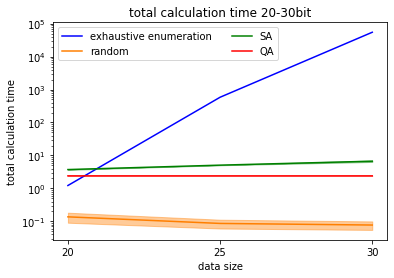

In [322]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_time_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_time_30['enumeration'] + std_time_30['enumeration'], mean_time_30['enumeration'] - std_time_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_time_30['random'] + std_time_30['random'], mean_time_30['random'] - std_time_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_time_30['SA'] + std_time_30['SA'], mean_time_30['SA'] - std_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_time_30['QA'] + std_time_30['QA'], mean_time_30['QA'] - std_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('total calculation time 20-30bit')
plt.savefig('auto10_1000/_30bit_total_calculation_time_mean_std_log.png')
plt.show()

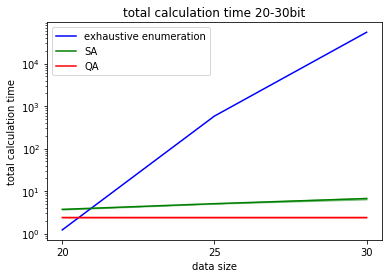

In [323]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_30, mean_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_time_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_time_30['enumeration'] + std_time_30['enumeration'], mean_time_30['enumeration'] - std_time_30['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_30, mean_time_30['random'] + std_time_30['random'], mean_time_30['random'] - std_time_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_time_30['SA'] + std_time_30['SA'], mean_time_30['SA'] - std_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_time_30['QA'] + std_time_30['QA'], mean_time_30['QA'] - std_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left')
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('total calculation time 20-30bit')
plt.savefig('auto10_1000/norandom_30bit_total_calculation_time_mean_std_log.png')
plt.show()

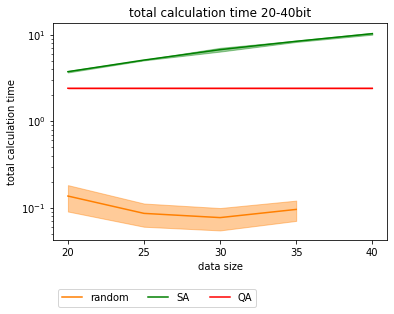

In [324]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_35, mean_time_35['random'] + std_time_35['random'], mean_time_35['random'] - std_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
#ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('auto10_1000/_35_40bit_total_calculation_time_mean_std_log.png')
plt.show()

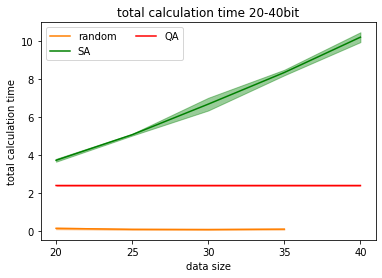

In [325]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_35, mean_time_35['random'] + std_time_35['random'], mean_time_35['random'] - std_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('auto10_1000/_40bit_total_calculation_time_mean_std.png')
plt.show()

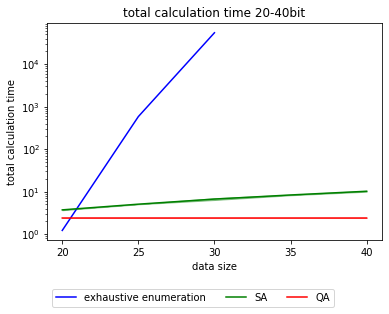

In [330]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_40, mean_time_40['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_time_30['enumeration'] + std_time_30['enumeration'], mean_time_30['enumeration'] - std_time_30['enumeration'], alpha=0.4)
#ax.fill_between(bit_list_40, mean_time_40['random'] + std_time_40['random'], mean_time_40['random'] - std_time_40['random'], alpha=0.4, color='#ff7f00#ax.fill_between(bit_list_40, mean_time_40['random'] + std_time_40['random'], mean_time_40['random'] - std_time_40['random'], alpha=0.4, color='#ff7f00'#)
ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
#ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('auto10_1000/norandom_30bit_40bit_total_calculation_time_mean_log.png')
plt.show()

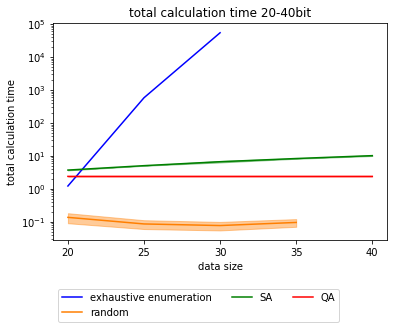

In [331]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_time_30['enumeration'] + std_time_30['enumeration'], mean_time_30['enumeration'] - std_time_30['enumeration'], alpha=0.4)
ax.fill_between(bit_list_35, mean_time_35['random'] + std_time_35['random'], mean_time_35['random'] - std_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
#ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('auto10_1000/norandom_30bit_40bit_total_calculation_time_mean_std_log.png')
plt.show()

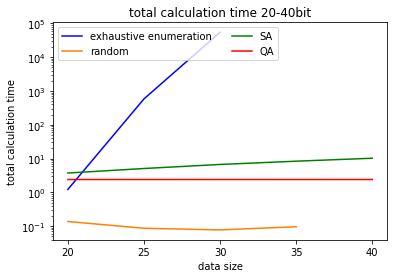

In [332]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_time_30['enumeration'] + std_time_30['enumeration'], mean_time_30['enumeration'] - std_time_30['enumeration'], alpha=0.4)
#ax.fill_between(bit_list_40, mean_time_40['random'] + std_time_40['random'], mean_time_40['random'] - std_time_40['random'], alpha=0.4, color='#ff7f00#ax.fill_between(bit_list_40, mean_time_40['random'] + std_time_40['random'], mean_time_40['random'] - std_time_40['random'], alpha=0.4, color='#ff7f00'#)
#ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('auto10_1000/_30bit_40bit_total_calculation_time_mean_log.png')
plt.show()

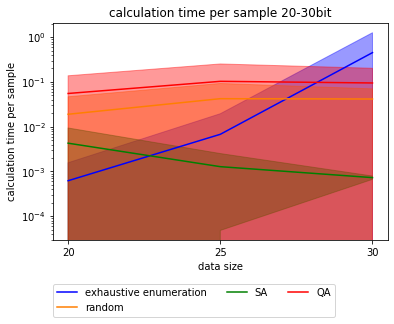

In [333]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_per_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_per_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_per_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_per_time_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_per_time_30['enumeration'] + std_per_time_30['enumeration'], mean_per_time_30['enumeration'] - std_per_time_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_per_time_30['random'] + std_per_time_30['random'], mean_per_time_30['random'] - std_per_time_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_per_time_30['SA'] + std_per_time_30['SA'], mean_per_time_30['SA'] - std_per_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_per_time_30['QA'] + std_per_time_30['QA'], mean_per_time_30['QA'] - std_per_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('calculation time per sample 20-30bit')
plt.savefig('auto10_1000/enustd_30bit_per_time_mean_std_log.png')
plt.show()

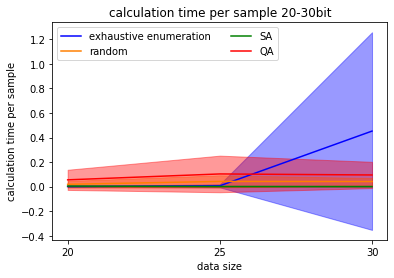

In [335]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_per_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_per_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_per_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_per_time_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_per_time_30['enumeration'] + std_per_time_30['enumeration'], mean_per_time_30['enumeration'] - std_per_time_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_per_time_30['random'] + std_per_time_30['random'], mean_per_time_30['random'] - std_per_time_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_per_time_30['SA'] + std_per_time_30['SA'], mean_per_time_30['SA'] - std_per_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_per_time_30['QA'] + std_per_time_30['QA'], mean_per_time_30['QA'] - std_per_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
#plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_30)
#ax.set_yscale('log')
plt.title('calculation time per sample 20-30bit')
plt.savefig('auto10_1000/enustd_30bit_per_time_mean_std.png')
plt.show()

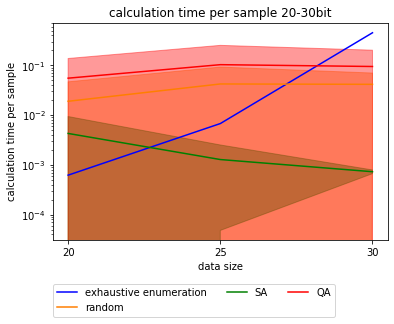

In [336]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_per_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_per_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_per_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_per_time_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_per_time_30['enumeration'] + std_per_time_30['enumeration'], mean_per_time_30['enumeration'] - std_per_time_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_per_time_30['random'] + std_per_time_30['random'], mean_per_time_30['random'] - std_per_time_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_per_time_30['SA'] + std_per_time_30['SA'], mean_per_time_30['SA'] - std_per_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_per_time_30['QA'] + std_per_time_30['QA'], mean_per_time_30['QA'] - std_per_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('calculation time per sample 20-30bit')
plt.savefig('auto10_1000/_30bit_per_time_mean_std_log.png')
plt.show()

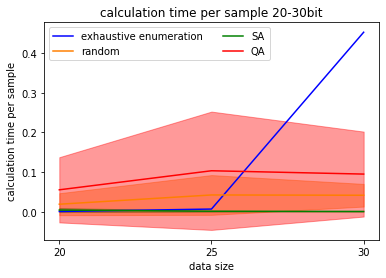

In [338]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_per_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_per_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_per_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_per_time_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_per_time_30['enumeration'] + std_per_time_30['enumeration'], mean_per_time_30['enumeration'] - std_per_time_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_per_time_30['random'] + std_per_time_30['random'], mean_per_time_30['random'] - std_per_time_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_per_time_30['SA'] + std_per_time_30['SA'], mean_per_time_30['SA'] - std_per_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_per_time_30['QA'] + std_per_time_30['QA'], mean_per_time_30['QA'] - std_per_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
#plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_30)
#ax.set_yscale('log')
plt.title('calculation time per sample 20-30bit')
plt.savefig('auto10_1000/_30bit_per_time_mean_std.png')
plt.show()

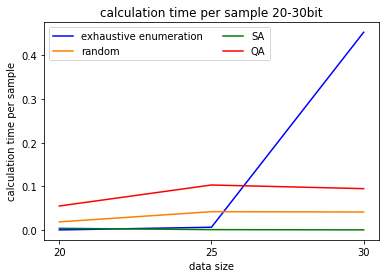

In [339]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_per_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_per_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_per_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_per_time_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_per_time_30['enumeration'] + std_per_time_30['enumeration'], mean_per_time_30['enumeration'] - std_per_time_30['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_30, mean_per_time_30['random'] + std_per_time_30['random'], mean_per_time_30['random'] - std_per_time_30['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_30, mean_per_time_30['SA'] + std_per_time_30['SA'], mean_per_time_30['SA'] - std_per_time_30['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_30, mean_per_time_30['QA'] + std_per_time_30['QA'], mean_per_time_30['QA'] - std_per_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
#plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_30)
#ax.set_yscale('log')
plt.title('calculation time per sample 20-30bit')
plt.savefig('auto10_1000/_30bit_per_time_mean.png')
plt.show()

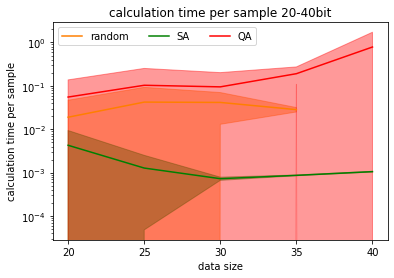

In [344]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_per_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_per_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_per_time_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_35, mean_per_time_35['random'] + std_per_time_35['random'], mean_per_time_35['random'] - std_per_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_per_time_40['SA'] + std_per_time_40['SA'], mean_per_time_40['SA'] - std_per_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_per_time_40['QA'] + std_per_time_40['QA'], mean_per_time_40['QA'] - std_per_time_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
ax.legend(loc='upper left', ncol=3)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('calculation time per sample 20-40bit')
plt.savefig('auto10_1000/_35_40bit_per_time_mean_std_log.png')
plt.show()

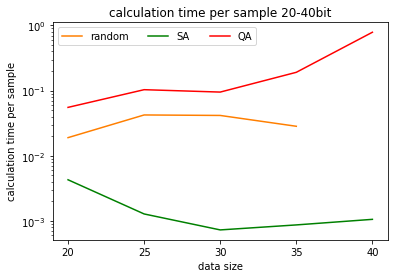

In [343]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_per_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_per_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_per_time_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_per_time_35['random'] + std_per_time_35['random'], mean_per_time_35['random'] - std_per_time_35['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_40, mean_per_time_40['SA'] + std_per_time_40['SA'], mean_per_time_40['SA'] - std_per_time_40['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_40, mean_per_time_40['QA'] + std_per_time_40['QA'], mean_per_time_40['QA'] - std_per_time_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
ax.legend(loc='upper left', ncol=3)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('calculation time per sample 20-40bit')
plt.savefig('auto10_1000/_35_40bit_per_time_mean_log.png')
plt.show()

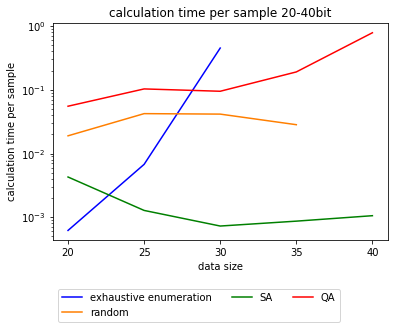

In [345]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_per_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_per_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_per_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_per_time_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_per_time_35['random'] + std_per_time_35['random'], mean_per_time_35['random'] - std_per_time_35['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_40, mean_per_time_40['SA'] + std_per_time_40['SA'], mean_per_time_40['SA'] - std_per_time_40['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_40, mean_per_time_40['QA'] + std_per_time_40['QA'], mean_per_time_40['QA'] - std_per_time_40['QA'], alpha=0.4, color='r')

ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
#ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('calculation time per sample 20-40bit')
plt.savefig('auto10_1000/_30_40bit_per_time_mean_log.png')
plt.show()

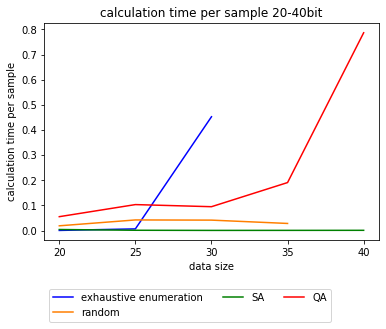

In [346]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_per_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_per_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_per_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_per_time_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_per_time_35['random'] + std_per_time_35['random'], mean_per_time_35['random'] - std_per_time_35['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_40, mean_per_time_40['SA'] + std_per_time_40['SA'], mean_per_time_40['SA'] - std_per_time_40['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_40, mean_per_time_40['QA'] + std_per_time_40['QA'], mean_per_time_40['QA'] - std_per_time_40['QA'], alpha=0.4, color='r')

ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
#ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('calculation time per sample 20-40bit')
plt.savefig('auto10_1000/_30_40bit_per_time_mean.png')
plt.show()

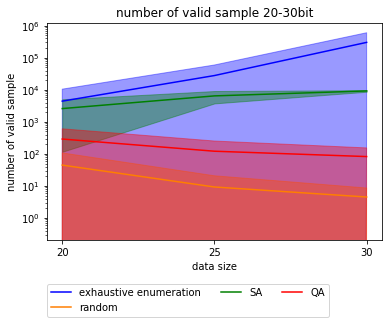

In [347]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_valid_y_num_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_valid_y_num_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_valid_y_num_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_valid_y_num_30['enumeration'] + std_valid_y_num_30['enumeration'], mean_valid_y_num_30['enumeration'] - std_valid_y_num_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_valid_y_num_30['random'] + std_valid_y_num_30['random'], mean_valid_y_num_30['random'] - std_valid_y_num_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_valid_y_num_30['SA'] + std_valid_y_num_30['SA'], mean_valid_y_num_30['SA'] - std_valid_y_num_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_valid_y_num_30['QA'] + std_valid_y_num_30['QA'], mean_valid_y_num_30['QA'] - std_valid_y_num_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper left', ncol=3)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('number of valid sample 20-30bit')
plt.savefig('auto10_1000/enustd_30bit_valid_y_num_mean_std_log.png')
plt.show()

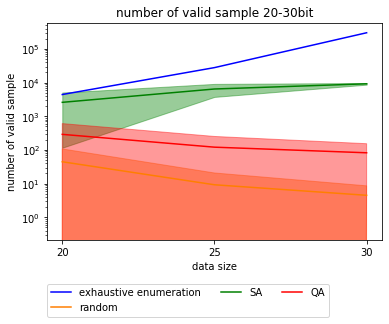

In [348]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_valid_y_num_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_valid_y_num_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_valid_y_num_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_valid_y_num_30['enumeration'] + std_valid_y_num_30['enumeration'], mean_valid_y_num_30['enumeration'] - std_valid_y_num_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_valid_y_num_30['random'] + std_valid_y_num_30['random'], mean_valid_y_num_30['random'] - std_valid_y_num_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_valid_y_num_30['SA'] + std_valid_y_num_30['SA'], mean_valid_y_num_30['SA'] - std_valid_y_num_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_valid_y_num_30['QA'] + std_valid_y_num_30['QA'], mean_valid_y_num_30['QA'] - std_valid_y_num_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper left', ncol=3)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('number of valid sample 20-30bit')
plt.savefig('auto10_1000/_30bit_valid_y_num_mean_std_log.png')
plt.show()

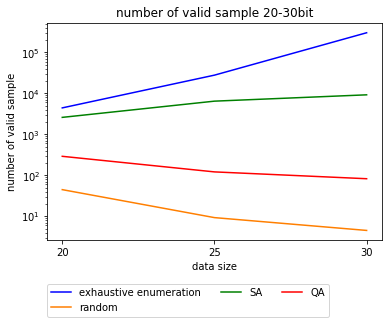

In [349]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_valid_y_num_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_valid_y_num_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_valid_y_num_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_valid_y_num_30['enumeration'] + std_valid_y_num_30['enumeration'], mean_valid_y_num_30['enumeration'] - std_valid_y_num_30['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_30, mean_valid_y_num_30['random'] + std_valid_y_num_30['random'], mean_valid_y_num_30['random'] - std_valid_y_num_30['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_30, mean_valid_y_num_30['SA'] + std_valid_y_num_30['SA'], mean_valid_y_num_30['SA'] - std_valid_y_num_30['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_30, mean_valid_y_num_30['QA'] + std_valid_y_num_30['QA'], mean_valid_y_num_30['QA'] - std_valid_y_num_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper left', ncol=3)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('number of valid sample 20-30bit')
plt.savefig('auto10_1000/_30bit_valid_y_num_mean_log.png')
plt.show()

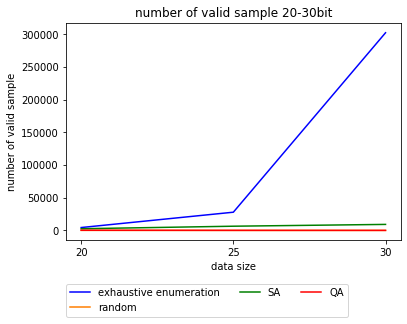

In [350]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_valid_y_num_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_valid_y_num_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_valid_y_num_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_valid_y_num_30['enumeration'] + std_valid_y_num_30['enumeration'], mean_valid_y_num_30['enumeration'] - std_valid_y_num_30['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_30, mean_valid_y_num_30['random'] + std_valid_y_num_30['random'], mean_valid_y_num_30['random'] - std_valid_y_num_30['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_30, mean_valid_y_num_30['SA'] + std_valid_y_num_30['SA'], mean_valid_y_num_30['SA'] - std_valid_y_num_30['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_30, mean_valid_y_num_30['QA'] + std_valid_y_num_30['QA'], mean_valid_y_num_30['QA'] - std_valid_y_num_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper left', ncol=3)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_30)
#ax.set_yscale('log')
plt.title('number of valid sample 20-30bit')
plt.savefig('auto10_1000/_30bit_valid_y_num_mean.png')
plt.show()

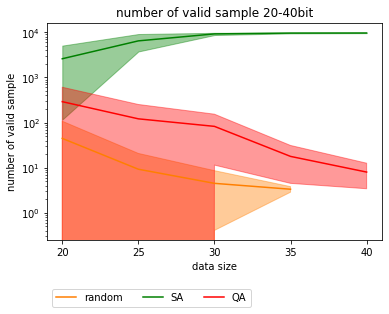

In [351]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_valid_y_num_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_valid_y_num_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_valid_y_num_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_35, mean_valid_y_num_35['random'] + std_valid_y_num_35['random'], mean_valid_y_num_35['random'] - std_valid_y_num_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_valid_y_num_40['SA'] + std_valid_y_num_40['SA'], mean_valid_y_num_40['SA'] - std_valid_y_num_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_valid_y_num_40['QA'] + std_valid_y_num_40['QA'], mean_valid_y_num_40['QA'] - std_valid_y_num_40['QA'], alpha=0.4, color='r')

ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
#ax.legend(loc='lower left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('number of valid sample 20-40bit')
plt.savefig('auto10_1000/_35_40bit_valid_y_num_mean_std_log.png')
plt.show()

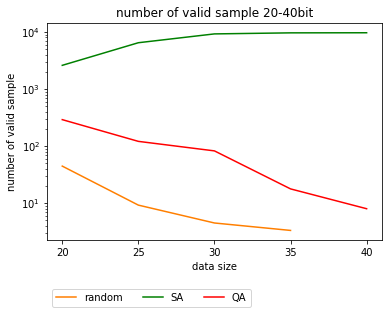

In [352]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_valid_y_num_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_valid_y_num_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_valid_y_num_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_valid_y_num_35['random'] + std_valid_y_num_35['random'], mean_valid_y_num_35['random'] - std_valid_y_num_35['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_40, mean_valid_y_num_40['SA'] + std_valid_y_num_40['SA'], mean_valid_y_num_40['SA'] - std_valid_y_num_40['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_40, mean_valid_y_num_40['QA'] + std_valid_y_num_40['QA'], mean_valid_y_num_40['QA'] - std_valid_y_num_40['QA'], alpha=0.4, color='r')

ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=3)
#ax.legend(loc='lower left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('number of valid sample 20-40bit')
plt.savefig('auto10_1000/_35_40bit_valid_y_num_mean_log.png')
plt.show()

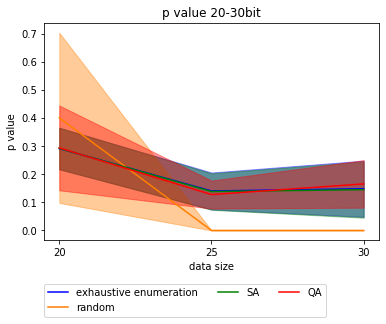

In [353]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_p_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_p_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_p_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_p_30['enumeration'] + std_p_30['enumeration'], mean_p_30['enumeration'] - std_p_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_p_30['random'] + std_p_30['random'], mean_p_30['random'] - std_p_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_p_30['SA'] + std_p_30['SA'], mean_p_30['SA'] - std_p_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_p_30['QA'] + std_p_30['QA'], mean_p_30['QA'] - std_p_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
#ax.legend(loc='lower left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_30)
#ax.set_yscale('log')
plt.title('p value 20-30bit')
plt.savefig('auto10_1000/enustd_30bit_p_mean_std.png')
plt.show()

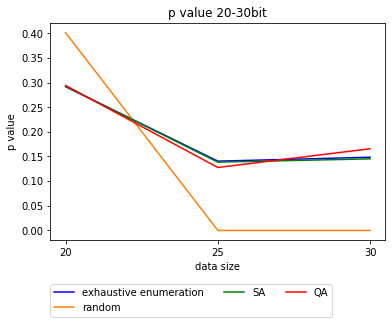

In [354]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_p_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_p_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_p_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_p_30['enumeration'] + std_p_30['enumeration'], mean_p_30['enumeration'] - std_p_30['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_30, mean_p_30['random'] + std_p_30['random'], mean_p_30['random'] - std_p_30['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_30, mean_p_30['SA'] + std_p_30['SA'], mean_p_30['SA'] - std_p_30['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_30, mean_p_30['QA'] + std_p_30['QA'], mean_p_30['QA'] - std_p_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
#ax.legend(loc='lower left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_30)
#ax.set_yscale('log')
plt.title('p value 20-30bit')
plt.savefig('auto10_1000/_30bit_p_mean.png')
plt.show()

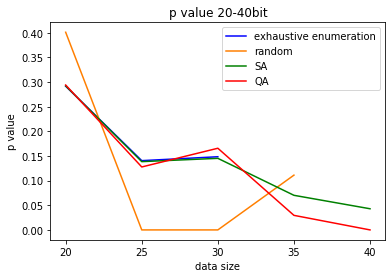

In [356]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_p_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_p_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_p_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_40, mean_p_40['random'] + std_p_40['random'], mean_p_40['random'] - std_p_40['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_40, mean_p_40['SA'] + std_p_40['SA'], mean_p_40['SA'] - std_p_40['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_40, mean_p_40['QA'] + std_p_40['QA'], mean_p_40['QA'] - std_p_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper right')
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('p value 20-40bit')
plt.savefig('auto10_1000/_30bit_40bit_p_mean.png')
plt.show()

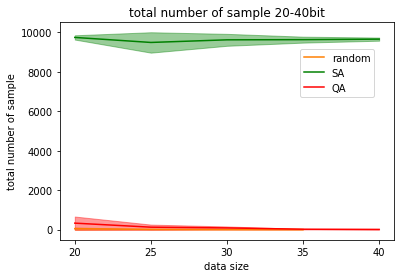

In [357]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_total_y_num_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_total_y_num_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_total_y_num_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_35, mean_total_y_num_35['random'] + std_total_y_num_35['random'], mean_total_y_num_35['random'] - std_total_y_num_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_total_y_num_40['SA'] + std_total_y_num_40['SA'], mean_total_y_num_40['SA'] - std_total_y_num_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_total_y_num_40['QA'] + std_total_y_num_40['QA'], mean_total_y_num_40['QA'] - std_total_y_num_40['QA'], alpha=0.4, color='r')

plt.legend(bbox_to_anchor=(1, 0.97), loc='upper right', borderaxespad=2, fontsize=10)
#plt.legend(bbox_to_anchor=(0, 0.2), loc='upper left', borderaxespad=0.5, fontsize=10, ncol = 2)
ax.set_xlabel('data size')
ax.set_ylabel('total number of sample')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('total number of sample 20-40bit')
plt.savefig('auto10_1000\_40bit_total_y_num_mean_std.png')
plt.show()

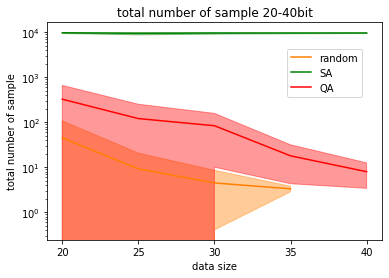

In [358]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_total_y_num_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_total_y_num_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_total_y_num_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_35, mean_total_y_num_35['random'] + std_total_y_num_35['random'], mean_total_y_num_35['random'] - std_total_y_num_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_total_y_num_40['SA'] + std_total_y_num_40['SA'], mean_total_y_num_40['SA'] - std_total_y_num_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_total_y_num_40['QA'] + std_total_y_num_40['QA'], mean_total_y_num_40['QA'] - std_total_y_num_40['QA'], alpha=0.4, color='r')

plt.legend(bbox_to_anchor=(1, 0.97), loc='upper right', borderaxespad=2, fontsize=10)
#plt.legend(bbox_to_anchor=(0, 0.2), loc='upper left', borderaxespad=0.5, fontsize=10, ncol = 2)
ax.set_xlabel('data size')
ax.set_ylabel('total number of sample')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total number of sample 20-40bit')
plt.savefig('auto10_1000\_35_40bit_total_y_num_mean_std_log.png')
plt.show()

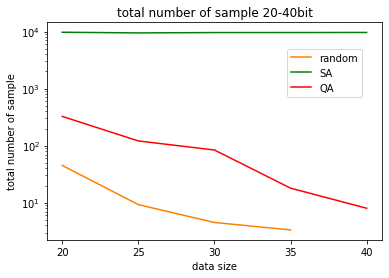

In [359]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_total_y_num_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_total_y_num_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_total_y_num_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_40, mean_total_y_num_40['random'] + std_total_y_num_40['random'], mean_total_y_num_40['random'] - std_total_y_num_40['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_40, mean_total_y_num_40['SA'] + std_total_y_num_40['SA'], mean_total_y_num_40['SA'] - std_total_y_num_40['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_40, mean_total_y_num_40['QA'] + std_total_y_num_40['QA'], mean_total_y_num_40['QA'] - std_total_y_num_40['QA'], alpha=0.4, color='r')

plt.legend(bbox_to_anchor=(1, 0.97), loc='upper right', borderaxespad=2, fontsize=10)
#plt.legend(bbox_to_anchor=(0, 0.2), loc='upper left', borderaxespad=0.5, fontsize=10, ncol = 2)
ax.set_xlabel('data size')
ax.set_ylabel('total number of sample')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total number of sample 20-40bit')
plt.savefig('auto10_1000\_35_40bit_total_y_num_mean_log.png')
plt.show()

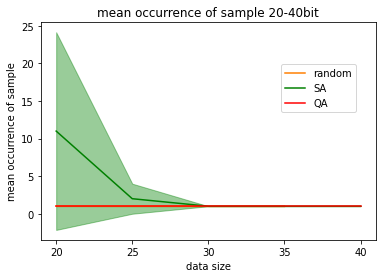

In [360]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_occurrence_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_occurrence_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_occurrence_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_35, mean_occurrence_35['random'] + std_occurrence_35['random'], mean_occurrence_35['random'] - std_occurrence_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_occurrence_40['SA'] + std_occurrence_40['SA'], mean_occurrence_40['SA'] - std_occurrence_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_occurrence_40['QA'] + std_occurrence_40['QA'], mean_occurrence_40['QA'] - std_occurrence_40['QA'], alpha=0.4, color='r')

#ax.legend(loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper right', borderaxespad=2, fontsize=10)
ax.set_xlabel('data size')
ax.set_ylabel('mean occurrence of sample')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('mean occurrence of sample 20-40bit')
plt.savefig('auto10_1000\_40bit_mean_occurrence_mean_std.png')
plt.show()